<a href="https://colab.research.google.com/github/Triginarsa/skin-cancer/blob/fandi-branch/Skin_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATASET SKIN CANCER MNIST HAM 10K


Input Data 

The input data are dermoscopic lesion images in JPEG format.

All lesion images are named using the scheme ISIC_<image_id>.jpg, where <image_id> is a 7-digit unique identifier. EXIF tags in the images have been removed; any remaining EXIF tags should not be relied upon to provide accurate metadata.

The lesion images were acquired with a variety of dermatoscope types, from all anatomic sites (excluding mucosa and nails), from a historical sample of patients presented for skin cancer screening, from several different institutions. Every lesion image contains exactly one primary lesion; other fiducial markers, smaller secondary lesions, or other pigmented regions may be neglected.

The distribution of disease states represent a modified “real world” setting whereby there are more benign lesions than malignant lesions, but an over-representation of malignancies.

The images in the data-set are separated into the following seven types of skin cancer:

**Actinic keratosis** **(akiec) **is considered to be a noncancerous (benign) type of skin cancer. However, if left untreated, it usually develops into squamous cell carcinoma (which is cancerous).

**Unlike actinic keratosis** **(bcc)**, basal cell carcinoma is a cancerous type of skin lesion that develops in the basal cell layer located in the lower part of the epidermis. It is the most common type of skin cancer accounting for 80% of all cases.

**Benign keratosis** **(bkl)** is a noncancerous and slow-growing type of skin cancer. They can be left untreated as they are typically harmless.

**Dermatofibromas** **(df)** are also noncancerous and usually harmless, thus no treatment is required. It is commonly found pinkish in color and appears like a round bump.

**Melanoma** **(mel)** is a type of malignant skin cancer that originated from melanocytes, cells that are responsible for the pigment of your skin.

**Melanocytic** **(nv)** nevi are a benign type of melanocytic tumor. Patients with melanocytic nevi are considered to be at a higher risk of melanoma.

**Vascular** **(vasc)** lesions are composed of a wide range of skin lesion including cherry angiomas, angiokeratomas, and pyogenic granulomas. They are similarly characterized as being red or purple in color and often appear as a raised bump.

In [1]:
! pip install -q kaggle

In [ ]:
# import your token from kaggle
from google.colab import files
files.upload()

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip skin-cancer-mnist-ham10000

# PREPROCESSING DATASET

In [5]:
import os
# Checking content folder
os.listdir('../content')

['.config',
 'hmnist_28_28_RGB.csv',
 'hmnist_28_28_L.csv',
 'ham10000_images_part_1',
 'HAM10000_images_part_2',
 'hmnist_8_8_L.csv',
 'hmnist_8_8_RGB.csv',
 'skin-cancer-mnist-ham10000.zip',
 'HAM10000_images_part_1',
 'kaggle.json',
 'ham10000_images_part_2',
 'HAM10000_metadata.csv',
 'sample_data']

In [6]:
# create base dir
base_dir = 'base_dir'
os.mkdir(base_dir)

In [7]:
# create train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# create val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

In [8]:
# create train subdir 7 categories
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)

In [9]:
# create val subdir 7 categories 
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

In [12]:
import pandas as pd
# read csv file
df_data = pd.read_csv('../content/HAM10000_metadata.csv')
df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


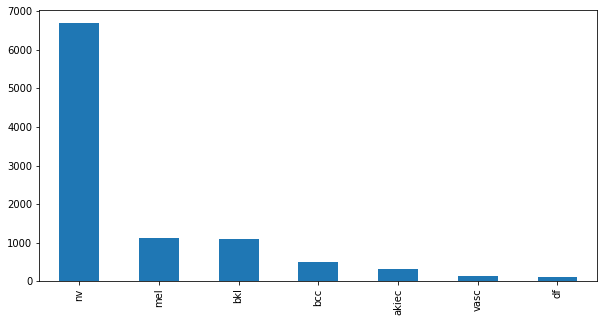

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
# chect distibution data
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
df_data['dx'].value_counts().plot(kind='bar', ax=ax1)

In [14]:
# how many images are associated with each lesion_id
df = df_data.groupby('lesion_id').count()
# have only one image associated with it
df = df[df['image_id'] == 1]
df.reset_index(inplace=True)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000001,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1


In [15]:
def identify_duplicates(x):
    unique_list = list(df['lesion_id'])
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
# create a new colum that is a copy of the lesion_id column
df_data['duplicates'] = df_data['lesion_id']
# apply the function to this new column
df_data['duplicates'] = df_data['duplicates'].apply(identify_duplicates)

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,has_duplicates


In [16]:
# count has duplicates and no duplicates
df_data['duplicates'].value_counts()

no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

In [17]:
# filter out images that don't have duplicates
df = df_data[df_data['duplicates'] == 'no_duplicates']
df.shape

(5514, 8)

In [18]:
from sklearn.model_selection import train_test_split
# create a val set using df because we are sure that none of these images
# have augmented duplicates in the train set
y = df['dx']
_, df_val = train_test_split(df, test_size=0.17, random_state=101, stratify=y)
df_val.shape

(938, 8)

In [19]:
# check df_val
df_val['dx'].value_counts()

nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

In [20]:
# identify val or train
def identify_val_rows(x):
    # create a list of all the lesion_id's in the val set
    val_list = list(df_val['image_id']) 
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'

In [23]:
# create a new colum that is a copy of the image_id column
df_data['train_or_val'] = df_data['image_id']
# apply the function to this new column
df_data['train_or_val'] = df_data['train_or_val'].apply(identify_val_rows)   
# filter out train rows
df_train = df_data[df_data['train_or_val'] == 'train']

In [24]:
len(df_train)

9077

In [25]:
len(df_val)

938

In [26]:
# check df_train
df_train['dx'].value_counts() 

nv       5954
mel      1074
bkl      1024
bcc       484
akiec     301
vasc      131
df        109
Name: dx, dtype: int64

In [27]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [28]:
# folder datasets
part_1 = os.listdir('../content/ham10000_images_part_1')
part_2 = os.listdir('../content/ham10000_images_part_2')

# list of train and val dataset
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])

In [29]:
import shutil
# copy image train
for image in train_list:
    # jpg file
    fname = image + '.jpg'
    # label
    label = df_data.loc[image,'dx']
    if fname in part_1:
        # dir jpg file 1
        src = os.path.join('../content/ham10000_images_part_1', fname)
        # destination train jpg file with 7 categories
        dst = os.path.join(train_dir, label, fname)
        # copy src to dst
        shutil.copyfile(src, dst)

    if fname in part_2:
        # dir jpg file 2
        src = os.path.join('../content/ham10000_images_part_2', fname)
        # destination train jpg file with 7 categories
        dst = os.path.join(train_dir, label, fname)
        # copy src to dst
        shutil.copyfile(src, dst)

In [30]:
# copy image val
for image in val_list:
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in part_1:
        src = os.path.join('../content/ham10000_images_part_1', fname)
        dst = os.path.join(val_dir, label, fname)
        shutil.copyfile(src, dst)

    if fname in part_2:
        src = os.path.join('../content/ham10000_images_part_2', fname)
        dst = os.path.join(val_dir, label, fname)
        shutil.copyfile(src, dst)

In [32]:
# check image train_dir
print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

5954
1074
1024
484
301
131
109


In [33]:
# check image val_dir
print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

751
39
75
30
26
11
6


In [56]:
# Make Augmented image then saved it locally
import sys
import PIL
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.2.0


In [36]:
# not augmented "nv" label because the data is already a lot
label_list = ['mel',
              'bkl',
              'bcc',
              'akiec',
              'vasc',
              'df']

In [61]:
for item in label_list:
    # We are creating temporary directories here because we delete these directories later
    # create a base dir
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
            # source path to image
            src = os.path.join('base_dir/train_dir/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)

    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = 'base_dir/train_dir/' + img_class

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                           target_size=(224,224),
                                           batch_size=batch_size)
    
    # Generate the augmented images and add them to the training folders
    num_aug_images_wanted = 6000 # total number of images we want to have in each class
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0,num_batches):
        imgs, labels = next(aug_datagen)
        
    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

Found 5920 images belonging to 1 classes.
Found 1024 images belonging to 1 classes.
Found 484 images belonging to 1 classes.
Found 301 images belonging to 1 classes.
Found 131 images belonging to 1 classes.
Found 109 images belonging to 1 classes.


In [62]:
# This is the original images plus the augmented images.
# The data distribution of train_dir is evenly distributed
# The distribution of val_dir hasn't changed
print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

5954
6020
5920
5858
5217
5290
4410


In [63]:
import matplotlib.pyplot as plt

ValueError: ignored

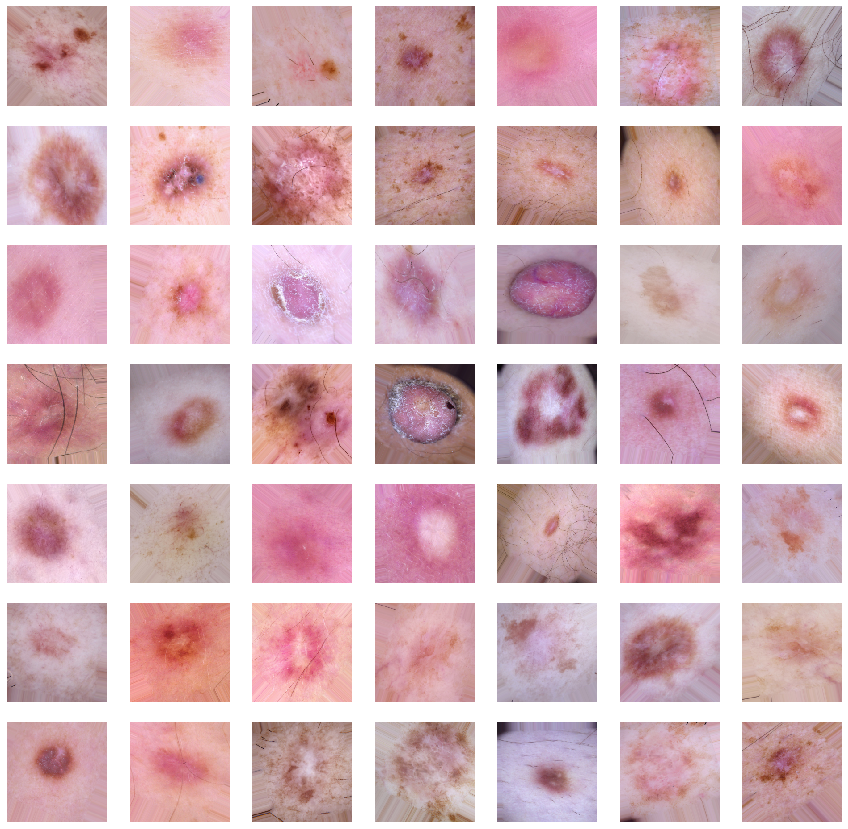

In [72]:
# Visualizaation image
def plots(ims, figsize=(15,15), rows=7, interp=False, titles=None): 
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
plots(imgs, titles=None)

# BUILD MODEL

In [119]:
# some constants
img_height, img_width, img_channels = 224,224,3
batch_size = 64
nb_classes = 7

In [120]:
# Set Variabel Here
train_dir = 'base_dir/train_dir'
validation_dir = 'base_dir/val_dir'

In [136]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Reshape
from tensorflow.keras.layers import Input, Flatten, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import top_k_categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras import layers

In [132]:
# Get a generator 
data_gen = ImageDataGenerator(preprocessing_function=mobilenet_v2.preprocess_input)

# Make data generator for training and validation data
train_data_gen = data_gen.flow_from_directory(train_dir, 
                                              target_size=(img_height, img_width), 
                                              class_mode="categorical", 
                                              shuffle=True, 
                                              batch_size=batch_size)

valid_data_gen = data_gen.flow_from_directory(validation_dir, 
                                              target_size=(img_height, img_width), 
                                              class_mode="categorical", 
                                              shuffle=False, 
                                              batch_size=batch_size)

Found 38669 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


In [138]:
# Get fine-tuning/transfer-learning model
def get_fine_tuning_model(base_model, top_model, inputs, learning_type):
    if learning_type=='transfer_learning':
        print("Doing transfer learning")
        K.set_learning_phase(0)
        base_model.trainable = False
        features = base_model(inputs)
        outputs = top_model(features)
    else:
        print("Doing fine-tuning")
        features = base_model(inputs)
        outputs = top_model(features)
    return Model(inputs, outputs)

In [139]:
# Use MobileNets family models as we have to deploy this on a mobile in the end
base_model = mobilenet_v2.MobileNetV2(input_shape=(img_height, img_width, img_channels),
                                 include_top=False, 
                                 weights='imagenet',
                                 pooling="avg")

In [140]:
# Define a top model: extra layers that we are going to add on 
# top of our base network
feature_inputs = Input(shape=base_model.output_shape, name='top_model_input')
x = Reshape((1,1,1280), name='reshape_1')(feature_inputs)
x = Dropout(0.5,name='drop')(x)
x = Conv2D(7, (1,1), name="last_conv", 
           kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Activation(activation="softmax", name="ouputs")(x)
outputs = Reshape((7,), name="reshape_2")(x)

# define the  model
top_model = Model(feature_inputs, outputs, name='top_model')

# get model for tranfser learning
inputs = Input(shape=(img_height, img_width, img_channels))
model = get_fine_tuning_model(base_model, top_model, inputs, "transfer_learning")
model.summary()

Doing transfer learning
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Model) (None, 1280)              2257984   
_________________________________________________________________
top_model (Model)            (None, 7)                 8967      
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________


In [141]:
# We need top 2 predictions in our case
def top_2(y_true, y_pred):
    return top_k_categorical_accuracy(y_true=y_true, y_pred=y_pred, k=2)

In [142]:
# compile the model and check it 
optimizer = Adam(0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['categorical_accuracy', top_2])

In [144]:
import glob

In [157]:
# always use earlystopping
# the restore_best_weights parameter load the weights of the best iteration once the training finishes
es = EarlyStopping(patience=5, restore_best_weights=True)

# checkpoint to save model
chkpt = ModelCheckpoint(filepath="../content/skin_cancer_final.h5", save_best_only=True, save_weights_only=True)

# reduce on plateau
rp = ReduceLROnPlateau(min_lr=1e-5, patience=2, factor=0.5, mode="max", monitor="val_categorical_accuracy")

# number of training and validation steps for training and validation
all_train_images = len(glob.glob("../content/base_dir/train_dir/**/*.jpg"))
all_valid_images = len(glob.glob("../content/base_dir/val_dir/**/*.jpg"))

nb_train_steps =  all_train_images // batch_size
nb_valid_steps = all_valid_images // batch_size

# number of epochs 
nb_epochs=10
print("Number of training and validation steps: ", nb_train_steps, nb_valid_steps)

Number of training and validation steps:  604 14


In [150]:
valid_images, valid_labels = [], []
valid_images = np.array(valid_images, dtype=np.float32)
valid_images = mobilenet_v2.preprocess_input(valid_images)
valid_labels = np.array(valid_labels)
valid_labels_cat = to_categorical(valid_labels, num_classes=7)
# Make class weights much simpler
class_weights = {0:1.0, 
                 1:1.0, 
                 2:1.0, 
                 3:3.0, 
                 4:1.5, 
                 5:1.0, 
                 6:1.0, 
                 7:2.5}

In [ ]:
# train the model 
history1 = model.fit_generator(train_data_gen, 
                              epochs=nb_epochs, 
                              steps_per_epoch=nb_train_steps, 
                              validation_data=(valid_images, valid_labels_cat),
                              class_weight = class_weights)

In [ ]:
# unfreeze some layers of base network for fine-tuning
for layer in model.layers[-20:]:
  layer.trainable =True

# compile the model and check it 
optimizer = SGD(0.0001, decay=1e-6, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['categorical_accuracy', top_2])

# checkpoint to save model
chkpt = ModelCheckpoint(filepath="../content/skin_cancer_final_fine_tuned.h5", save_best_only=True, save_weights_only=True)

In [ ]:
# fine-tune our current model
history2 = model.fit_generator(train_data_gen, 
                              epochs=nb_epochs, 
                              steps_per_epoch=nb_train_steps, 
                              validation_data=valid_data_gen,
                              validation_steps = nb_valid_steps, 
                              callbacks=[es,chkpt, rp])

# EVALUATE

In [ ]:
# load best weights
model.load_weights("../content/skin_cancer_final_fine_tuned.h5")

# Make predictions on the validation set
preds = model.predict(valid_images)
preds = np.argmax(preds, axis=-1)

# VISUALIZATION

In [ ]:
from skimage.io import imread, imsave
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import cv2
import glob
import json
import h5py
import seaborn as sns
import matplotlib.pylab as pl

In [ ]:
# Get the confusion matrix
cm = confusion_matrix(y_true=valid_labels, y_pred=preds)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10,5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt=".0f")

# labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

# ticks
ax.xaxis.set_ticklabels(list(class_indices.keys()))
ax.yaxis.set_ticklabels(list(class_indices.keys()))
plt.show()


In [ ]:
# Generate a classification report
cancer_report = classification_report(valid_labels, preds, target_names=list(class_indices.keys()))
print(cancer_report)

# SAVE MODEL


In [ ]:
# save the model for future use
model.save("../content/skin_cancer_best_model.h5")

In [ ]:
# save the architecture as well for future use 
json_string = model.to_json()

f = open("../content/skin_cancer_best_model_arch.json", "w")
json.dump(json_string, f)
f.close()

# CONVERT TF LITE

In [ ]:
# convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


In [ ]:
# write the model to disk
f = open("skin_cancer_best_model.tflite", "wb")
f.write(tflite_model)
f.close()

In [ ]:
# check if the model is saved correctly or not
f = open("skin_cancer_best_model.tflite", "rb")
tflite_model_cus = f.read()
f.close()

In [ ]:
# fire up a tflite interpreter
interpreter = tf.lite.Interpreter(model_content=tflite_model_cus)
interpreter.allocate_tensors()

In [ ]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Check the inputs 
input_details

In [ ]:
# Check the outputs 
output_details

In [ ]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

# Test the TensorFlow model on random input data.
tf_results = model(tf.constant(input_data))

# Compare the result.
for tf_result, tflite_result in zip(tf_results, tflite_results):
  np.testing.assert_almost_equal(tf_result, tflite_result, decimal=5)